# Q1

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

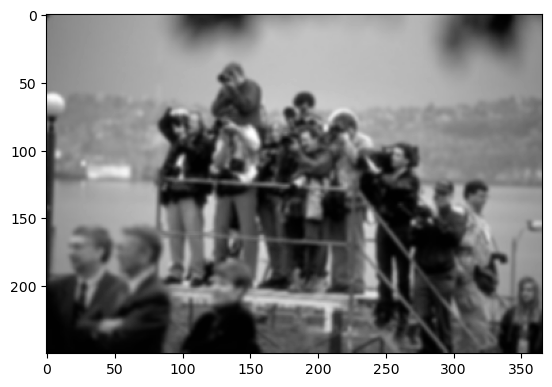

In [5]:
img = cv2.imread("/home/snucse/Downloads/blur.tif")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'median filter')

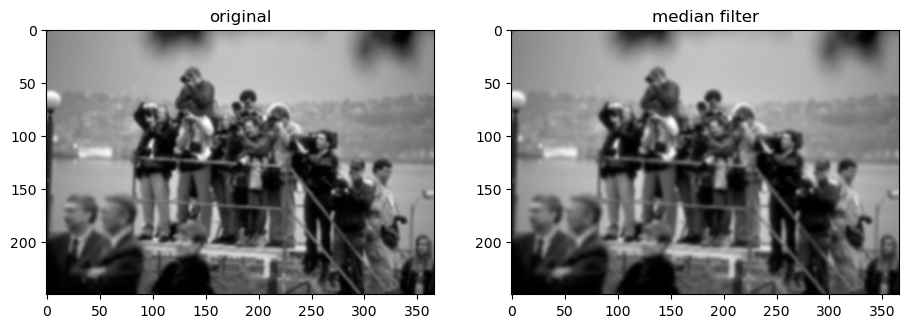

In [20]:
median = cv2.blur(img, (3, 3))
plt.figure(figsize=(11, 6))
plt.subplot(121)
plt.imshow(img, cmap = "gray")
plt.title("original")

plt.subplot(122)
plt.imshow(median, cmap = "gray")
plt.title("median filter")


Text(0.5, 1.0, 'Enhanced')

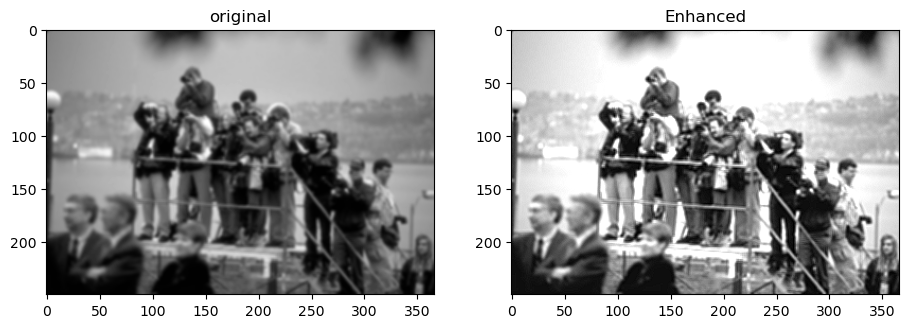

In [69]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

brightness = 5
contrast = 1.4
image_sharp = cv2.addWeighted(image_sharp, contrast, np.zeros(image.shape, image.dtype), 0, brightness)

plt.figure(figsize=(11, 6))
plt.subplot(121)
plt.imshow(img, cmap = "gray")
plt.title("original")

plt.subplot(122)
plt.imshow(image_sharp, cmap = "gray")
plt.title("Enhanced")

In [21]:
def apply_gamma_correction(image, gamma):
    img = np.copy(image)
    gamma_correction = 1.0 / gamma
    # Iterate over each pixel
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            # Get pixel color
            color = img[y, x]
#             print(color)
            # Apply gamma correction to each channel
#             new_red = 255 * (color[2] / 255) ** gamma_correction
#             new_green = 255 * (color[1] / 255) ** gamma_correction
            new_gray = 255 * (color / 255) ** gamma_correction
            # Update pixel color
            img[y, x] = np.array([new_gray], dtype=np.uint8)
    return img

Text(0.5, 1.0, 'gamma correction filter')

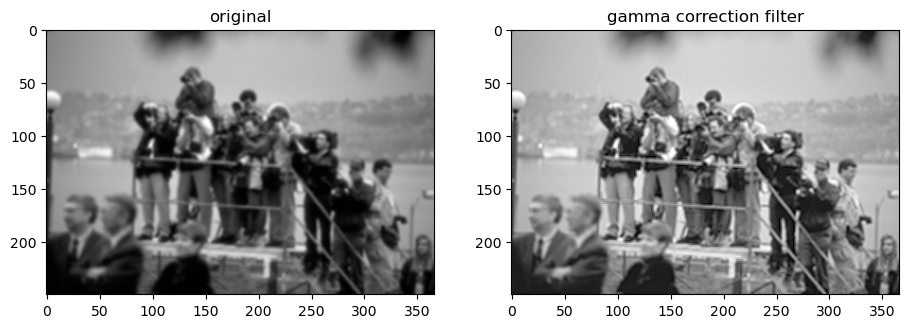

In [23]:
gamma_corrected = apply_gamma_correction(image_sharp, 1.5)

plt.figure(figsize=(11, 6))
plt.subplot(121)
plt.imshow(img, cmap = "gray")
plt.title("original")

plt.subplot(122)
plt.imshow(gamma_corrected, cmap = "gray")
plt.title("gamma correction filter")

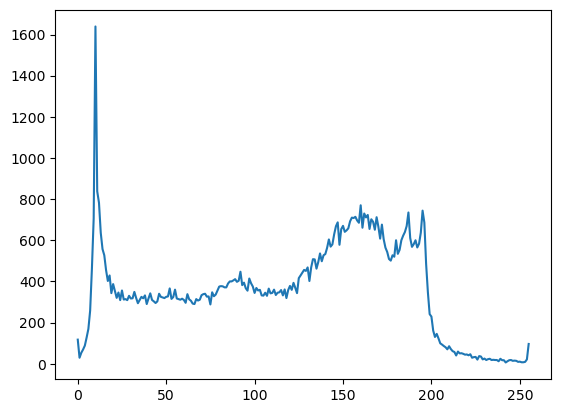

In [32]:
histg = cv2.calcHist([image_sharp],[0],None,[256],[0,256])  
plt.plot(histg) 
plt.show() 

Text(0.5, 1.0, 'hist_eq')

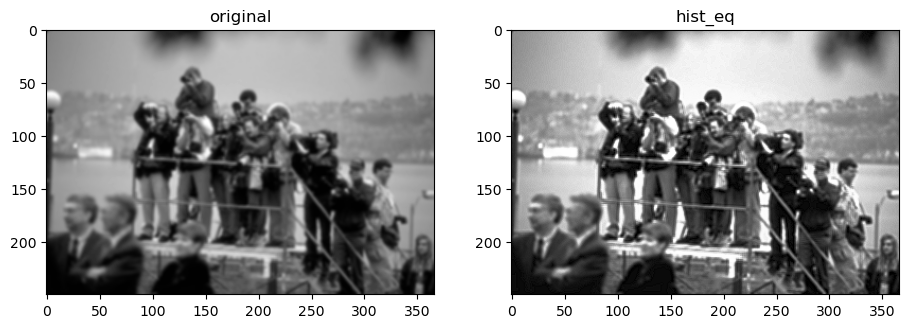

In [34]:
hist_eq = cv2.equalizeHist(image_sharp)

plt.figure(figsize=(11, 6))
plt.subplot(121)
plt.imshow(img, cmap = "gray")
plt.title("original")

plt.subplot(122)
plt.imshow(hist_eq, cmap = "gray")
plt.title("hist_eq")

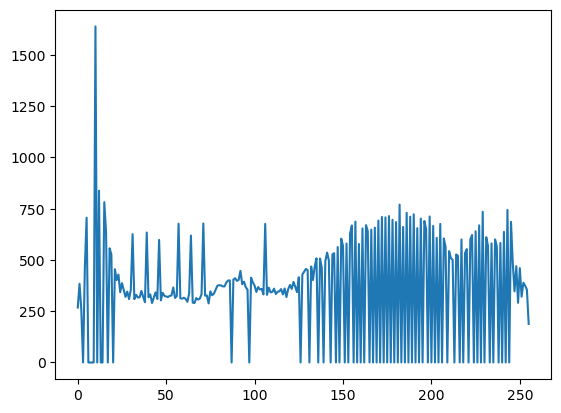

In [35]:
histg = cv2.calcHist([hist_eq],[0],None,[256],[0,256])  
plt.plot(histg) 
plt.show() 

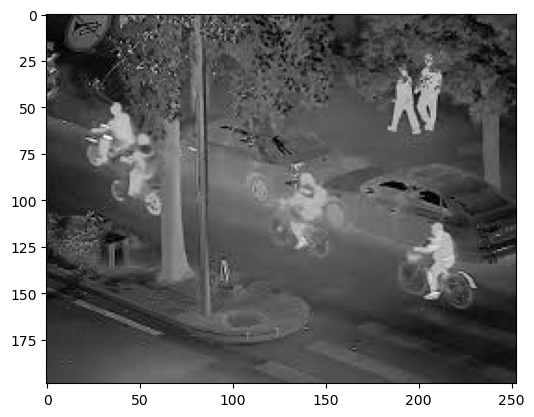

In [36]:
ref = cv2.imread(r"/home/snucse/Downloads/NightVision.jpg")
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
plt.imshow(ref, cmap = "gray")

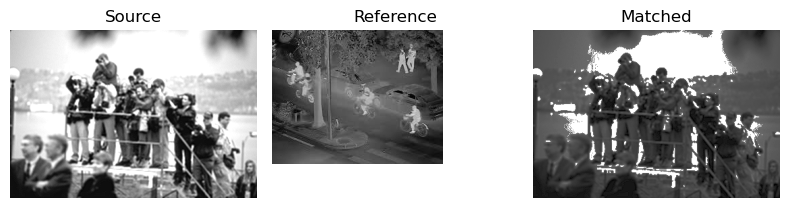

In [73]:
from skimage.exposure import match_histograms
matched = match_histograms(image_sharp, ref) 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,  figsize=(8, 3),sharex=True, sharey=True) 
  
for aa in (ax1, ax2, ax3): 
    aa.set_axis_off() 

ax1.imshow(image_sharp, cmap='gray') 
ax1.set_title('Source') 
ax2.imshow(ref, cmap='gray') 
ax2.set_title('Reference') 
ax3.imshow(matched, cmap='gray') 
ax3.set_title('Matched') 
  
plt.tight_layout() 
plt.show() 

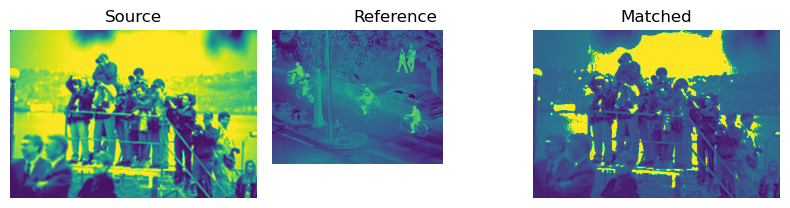

In [75]:
matched = match_histograms(image_sharp, ref) 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,  figsize=(8, 3),sharex=True, sharey=True) 
  
for aa in (ax1, ax2, ax3): 
    aa.set_axis_off() 
ax1.imshow(image_sharp) 
ax1.set_title('Source') 
ax2.imshow(ref) 
ax2.set_title('Reference') 
ax3.imshow(matched) 
ax3.set_title('Matched') 
  
plt.tight_layout() 
plt.show() 

# Q2

In [106]:
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt

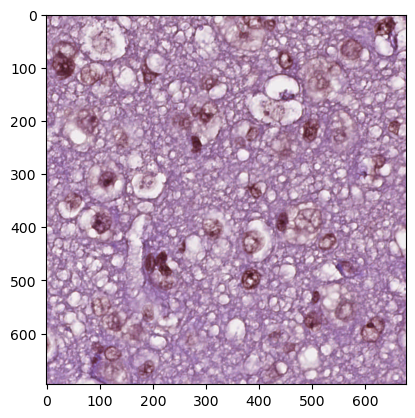

In [98]:
def imshow(img, ax=None):
	if ax is None:
		ret, encoded = cv2.imencode(".jpg", img)
		display(Image(encoded))
	else:
		ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
		ax.axis('off')


img = cv2.imread("image.png")

plt.imshow(img)

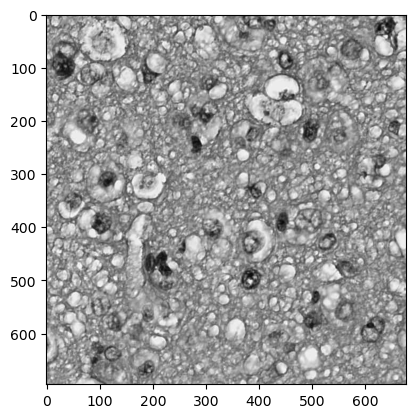

In [99]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

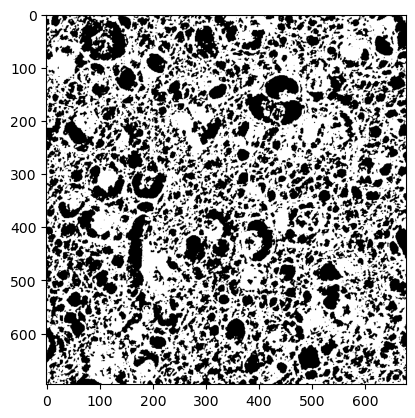

In [100]:
#Threshold Processing
ret, bin_img = cv2.threshold(gray,0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(bin_img, cmap='gray')


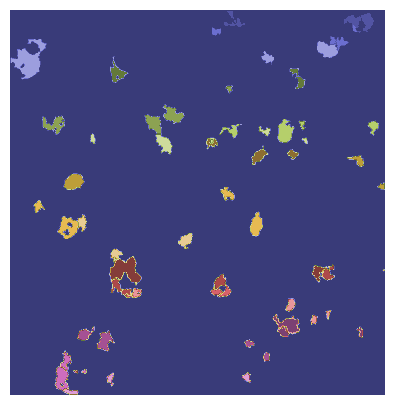

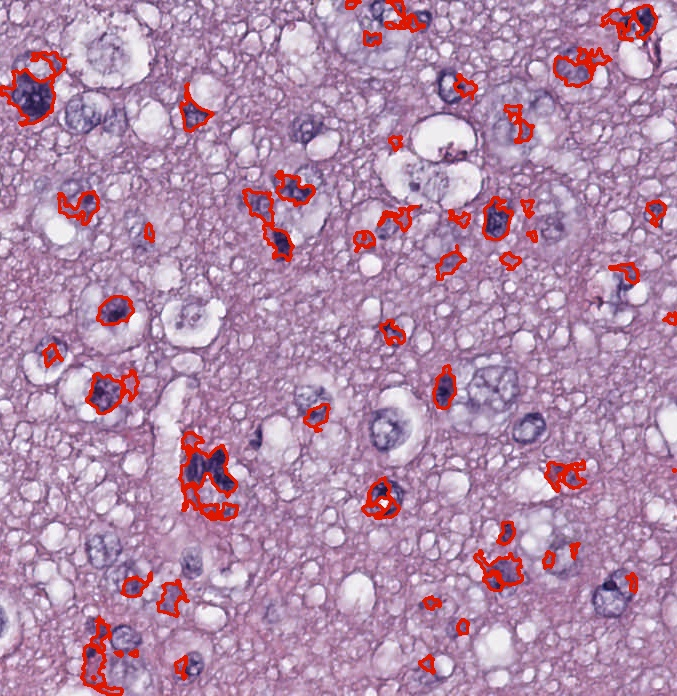

In [107]:
# watershed Algorithm
markers = cv2.watershed(img, markers)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()


labels = np.unique(markers)

coins = []
for label in labels[2:]: 

# Create a binary image in which only the area of the label is in the foreground 
#and the rest of the image is in the background 
	target = np.where(markers == label, 255, 0).astype(np.uint8)

# Perform contour extraction on the created binary image
	contours, hierarchy = cv2.findContours(
		target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
	)
	coins.append(contours[0])

# Draw the outline
img = cv2.drawContours(img, coins, -1, color=(0, 23, 223), thickness=2)
imshow(img)


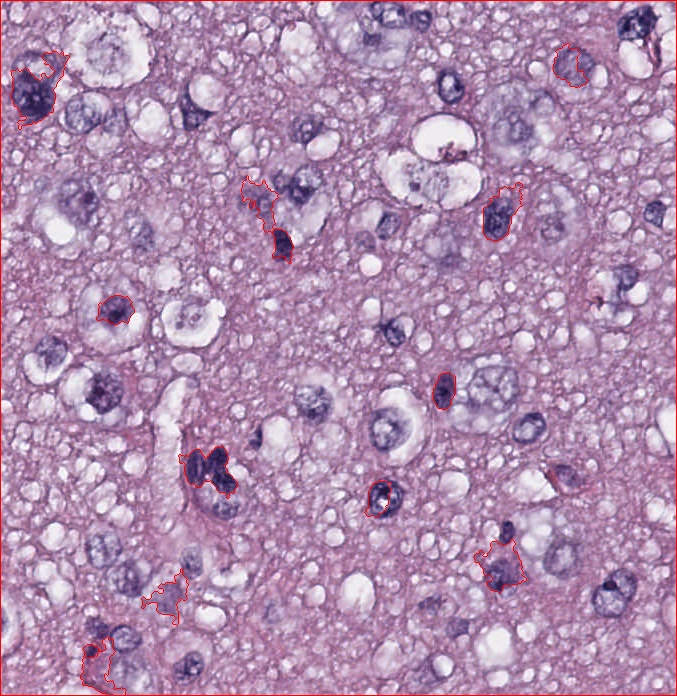

In [112]:
import cv2
import numpy as np

def segment_image_watershed(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to obtain binary image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # Perform morphological operations to remove noise
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    
    # Sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
    
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Marker labelling
    _, markers = cv2.connectedComponents(sure_fg)
    
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1
    
    # Mark unknown region with 0
    markers[unknown == 255] = 0
    
    # Apply watershed algorithm
    markers = cv2.watershed(image, markers)
    image[markers == -1] = [0, 0, 255]  # Mark boundaries in red
    
    # Display segmented image
    imshow(image)


segment_image_watershed("image.png")


# Q3

In [41]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [34]:
# Function to load and preprocess images
def load_data(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (100, 100)) 
        img = img / 255.0 
        images.append(img)
        labels.append(label)
    return images, labels

malign_folder = r"/home/snucse/Downloads/Breast Tumor Dataset(4)/Inbreast Dataset/Malignant"
malign_images, malign_labels = load_data(malign_folder, 1)

benign_folder = r"//home/snucse/Downloads/Breast Tumor Dataset(4)/Inbreast Dataset/Benign"
benign_images, benign_labels = load_data(benign_folder, 0)

images = np.array(malign_images + benign_images)
labels = np.array(malign_labels + benign_labels)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Reshape the input data into 2D format
num_samples, height, width, channels = X_train.shape
X_train_reshaped = X_train.reshape(num_samples, height * width * channels)

num_samples, height, width, channels = X_test.shape
X_test_reshaped = X_test.reshape(num_samples, height * width * channels)

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

rf_classifier.fit(X_train_reshaped, y_train)

predictions = rf_classifier.predict(X_test_reshaped)

predictions_binary = np.argmax(predictions, axis=1)

accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions_binary)
print("Accuracy:", accuracy)


Accuracy: 0.7272727272727273


In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Reshape the input data into 2D format
num_samples_train, height, width, channels = X_train.shape
X_train_reshaped = X_train.reshape(num_samples_train, height * width * channels)

num_samples_test, _, _, _ = X_test.shape
X_test_reshaped = X_test.reshape(num_samples_test, height * width * channels)

y_train_1d = np.argmax(y_train, axis=1)
y_test_1d = np.argmax(y_test, axis=1)

svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train_reshaped, y_train_1d)

predictions = svm_classifier.predict(X_test_reshaped)

accuracy = accuracy_score(y_test_1d, predictions)
print("Accuracy:", accuracy)



Accuracy: 0.6363636363636364


In [50]:
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Flatten(),
Dense(512, activation='relu'),
Dropout(0.5),
Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15, batch_size=24, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5923 - loss: 0.7112 - val_accuracy: 0.6364 - val_loss: 0.7016
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6892 - loss: 0.6550 - val_accuracy: 0.6364 - val_loss: 0.7147
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6924 - loss: 0.6074 - val_accuracy: 0.6364 - val_loss: 0.6904
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6707 - loss: 0.6416 - val_accuracy: 0.6364 - val_loss: 0.6672
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6804 - loss: 0.6345 - val_accuracy: 0.6364 - val_loss: 0.6696
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6193 - loss: 0.6653 - val_accuracy: 0.6364 - val_loss: 0.6778
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6540 - loss: 0.6209 - val_accuracy: 0.7727 - val_loss: 0.6821
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6619 - loss: 0.6281 - val_accuracy: 0.7727 - val_loss: 0.6434
